In [1]:
import matplotlib.pyplot as plt
import random, numpy as np, pandas as pd

class Individual(object):

    def __init__(self, alleles):
        self.alleles = alleles         # class named "Individual" taking list of alleles as arguments

    def get_fitness(self):   # method to calculate the fitness
        final_fitness = 1
        for a in self.alleles:
            final_fitness = final_fitness * a.fitness
        return final_fitness

    def get_genotype(self): #Individual object as its argument, and concatenates 
                           #the name of each allele to generate the genotype
        result = ''
        for a in self.alleles:
            result = result + a.name
        return result

class Allele(object):
 
    def __init__(self, name, fitness):   # class named "Allele" having name and fitness as attributes
        self.name = name
        self.fitness = fitness

class Locus(object):

    def __init__(self, name):    # class named "Locus" to hold the alleles using a list
        self.name = name
        self.alleles = []

    def add_allele(self, allele):  # method to add alleles 
        self.alleles.append(allele)

    def get_random_allele(self):   # method to pick a random allele
        return random.choice(self.alleles)

def create_individual(loci): # creates and returns Individuals with randomly-picked alleles, given a set of loci
    alleles_for_individual = []
    for locus in loci:
        alleles_for_individual.append(locus.get_random_allele())
    i = Individual(alleles_for_individual)
    return i

def create_population(size, loci):  # method to create a population
    all_individuals = []
    for i in range(size):
        all_individuals.append(create_individual(loci))
    return all_individuals

def summarize_alleles_header(loci, output_file):
    for locus in loci:
        for allele in locus.alleles:
            alleles_output.write(allele.name + ',')
    alleles_output.write('\n')

def summarize_alleles(population, loci, output_file):
    for locus in loci:                           # method for writing allele frequency in output file
        for allele in locus.alleles:
            freq = get_allele_frequency(population, allele)
            output_file.write(str(freq) + ',')
    output_file.write('\n')

def get_allele_frequency(population, allele):  # method to calculate the allele frequency
    allele_count = 0
    for individual in population:
        if allele in individual.alleles:
            allele_count += 1
    return allele_count / len(population)

def individual_from_population(population, loci):
    individual_alleles = []
    for locus in loci:
        all_alleles = []                  # method to pick random allele in a population belong to a locus
        for individual in population:
            for allele in individual.alleles:
                if allele in locus.alleles:
                    all_alleles.append(allele)
        this_allele = random.choice(all_alleles)
        individual_alleles.append(this_allele)
    return Individual(individual_alleles)

def single_generation(population):   # method to remove the individual from the population if it has low fitness score
    for individual in list(population):
        if random.random() > individual.get_fitness():
            population.remove(individual)
    for i in range(100 - len(population)):
        population.append(individual_from_population(population, all_loci))

locus1 = Locus('locus one')
locus1.add_allele(Allele('A', 1))
locus1.add_allele(Allele('a', 0.9))
locus2 = Locus('locus two')       # Initializing the locus ,alleles
locus2.add_allele(Allele('B', 1))
locus2.add_allele(Allele('b', 0.8))
locus3 = Locus('locus three')
locus3.add_allele(Allele('C', 1))
locus3.add_allele(Allele('c', 0.7))
all_loci = [locus1, locus2, locus3]

my_population = create_population(100, all_loci)   # function calls for generation of population
alleles_output = open(r'C:\Users\Ram Kumar R S\Desktop\alleles.csv', 'w')
summarize_alleles_header( all_loci, alleles_output)

for i in range(100):
    summarize_alleles(my_population, all_loci, alleles_output)
    single_generation(my_population)        
alleles_output.close()

Text(0.5, 1.0, 'Simulated Allele Frequency')

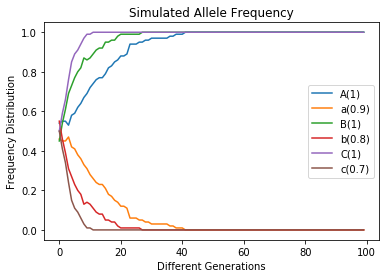

In [2]:
gen=np.arange(0,100)  # The generations
f1=pd.read_csv(r'C:\Users\Ram Kumar R S\Desktop\alleles.csv') # Reading the csv file
A,a,B,b,C,c=f1['A'],f1['a'],f1['B'],f1['b'],f1['C'],f1['c']  # Extracting the required columns and assignments

plt.plot(gen,A,label='A(1)')
plt.plot(gen,a,label='a(0.9)')
plt.plot(gen,B,label='B(1)')
plt.plot(gen,b,label='b(0.8)')
plt.plot(gen,C,label='C(1)')
plt.plot(gen,c,label='c(0.7)')
plt.xlabel("Different Generations")
plt.ylabel('Frequency Distribution')
plt.legend()
plt.title('Simulated Allele Frequency')